<a href="https://colab.research.google.com/github/pony-yyy/GroupWork/blob/main/Restaurant_in_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [64]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [65]:
# Query all data from the table
query = f"""
  SELECT
  b.business_id,
  t.text AS review
FROM
  `{project_id}.{dataset_name}.All_data_cleaned` b
INNER JOIN
  `{project_id}.{dataset_name}.restaurant_tips` t
ON
  b.business_id = t.business_id
WHERE
  b.state = 'MO';

"""

query_job = bigquery_client.query(query)
results = query_job.result()

reviewInPa_df = query_job.to_dataframe()
reviewInPa_df

,business_id,review
0,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi..."
1,7Rm9Ba50bw23KTA8RedZYg,They are closing at 10pm for maintenance tonig...
2,aK6R2akvIK9ijw3FvDy8vw,Basically same food as rally's for $5 more
3,aK6R2akvIK9ijw3FvDy8vw,Breakfast ALL day!!!!
4,aK6R2akvIK9ijw3FvDy8vw,420 tacos and more - a ticket over $40 - and o...
...,...,...
56109,yM8LlTInbQH4FwWC97lz6w,Slow ass mcd's drivethru smh
56110,nDMRoUVRnfoVUXTJuHHqHg,Two meals with a dessertwill easily cost you $...
56111,5MTmUITf21K6iO3rhzha2w,They use canned mushrooms. Not a fan of that...
56112,QwH__zx8N0TmF0r4o4yOuA,I just witnessed the absolute RUDEST interacti...


In [66]:
import pandas as pd
from textblob import TextBlob
import numpy as np

target_column = 'review'

reviewInPa_df['Polarity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
reviewInPa_df['Subjectivity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)

reviewInPa_df['Sentiment'] = np.where(reviewInPa_df['Polarity'] > 0, 'Positive', np.where(reviewInPa_df['Polarity'] < 0, 'Negative', 'Neutral'))

reviewInPa_df

,business_id,review,Polarity,Subjectivity,Sentiment
0,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",0.014286,0.607143,Positive
1,7Rm9Ba50bw23KTA8RedZYg,They are closing at 10pm for maintenance tonig...,0.000000,0.000000,Neutral
2,aK6R2akvIK9ijw3FvDy8vw,Basically same food as rally's for $5 more,0.250000,0.312500,Positive
3,aK6R2akvIK9ijw3FvDy8vw,Breakfast ALL day!!!!,0.000000,0.000000,Neutral
4,aK6R2akvIK9ijw3FvDy8vw,420 tacos and more - a ticket over $40 - and o...,-0.050347,0.833333,Negative
...,...,...,...,...,...
56109,yM8LlTInbQH4FwWC97lz6w,Slow ass mcd's drivethru smh,-0.300000,0.400000,Negative
56110,nDMRoUVRnfoVUXTJuHHqHg,Two meals with a dessertwill easily cost you $...,0.191667,0.608333,Positive
56111,5MTmUITf21K6iO3rhzha2w,They use canned mushrooms. Not a fan of that...,0.000000,0.000000,Neutral
56112,QwH__zx8N0TmF0r4o4yOuA,I just witnessed the absolute RUDEST interacti...,-0.291667,0.602778,Negative


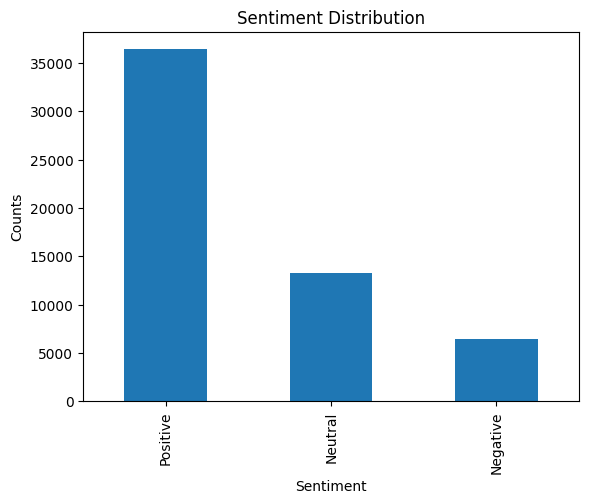

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = reviewInPa_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [68]:
positive_reviews = reviewInPa_df[reviewInPa_df['Sentiment'] == 'Positive']

positive_review_counts = positive_reviews.groupby('business_id').size()

top_10_positive_businesses = positive_review_counts.sort_values(ascending=False).head(10)

print(top_10_positive_businesses)

business_id
I_3LMZ_1m2mzR0oLIOePIg    406
vWjME92WddneF98IqzaNfQ    218
iRIHK8-EwpeffwvoO4nzIA    194
NHb6QTrJOnyIj-Zd0fYzFg    189
cQIh4YJlVtZI9TLF5_smOg    184
FryXEasH74MQDnj5Bvz3QA    179
2BMk_drsikKWslJCXmQtjQ    150
_aKr7POnacW_VizRKBpCiA    149
S26FJcC298XNpN2cZiwOrA    140
YPTYOQO8Lg9BtHsRwYBY7g    131
dtype: int64


In [69]:
top_10_positive_businesses_df = top_10_positive_businesses.reset_index()
top_10_positive_businesses_df.columns = ['business_id', 'positive_review_count']

print(top_10_positive_businesses_df)

              business_id  positive_review_count
0  I_3LMZ_1m2mzR0oLIOePIg                    406
1  vWjME92WddneF98IqzaNfQ                    218
2  iRIHK8-EwpeffwvoO4nzIA                    194
3  NHb6QTrJOnyIj-Zd0fYzFg                    189
4  cQIh4YJlVtZI9TLF5_smOg                    184
5  FryXEasH74MQDnj5Bvz3QA                    179
6  2BMk_drsikKWslJCXmQtjQ                    150
7  _aKr7POnacW_VizRKBpCiA                    149
8  S26FJcC298XNpN2cZiwOrA                    140
9  YPTYOQO8Lg9BtHsRwYBY7g                    131


In [70]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

# Query all data from the table
query = f"""
   SELECT business_id,categories
   FROM `{project_id}.{dataset_name}.{table_name}`;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

categories_df = query_job.to_dataframe()
categories_df

,business_id,categories
0,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants"
1,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,RK6-cJ9hj53RzOlCBmpT-g,"Restaurants, Italian, Food Trucks, Food"
3,EuRGgOwJ0g1vTj2R04j37Q,"Seafood, Restaurants"
4,pmuuoDqNZp7518AUd-YmPA,"Restaurants, Bakeries, Caterers, Bagels, Food,..."
...,...,...
52281,xThXwInJdMTI2yhgY3Uwyw,"Restaurants, Mexican"
52282,QKB21Alitgj-m6oEoFZFBw,"Restaurants, Mexican"
52283,4D19uG4enigRAsvTVmn61g,"Restaurants, Mexican"
52284,HUJLxKMVmUvreA-07qUitg,"Restaurants, Mexican"


In [71]:
categories_in_top_10_businesses = pd.merge(top_10_positive_businesses_df, categories_df, on='business_id', how='inner')
categories_in_top_10_businesses

,business_id,positive_review_count,categories
0,I_3LMZ_1m2mzR0oLIOePIg,406,"Food, Restaurants, Caterers, Smokehouse, Barbe..."
1,vWjME92WddneF98IqzaNfQ,218,"Restaurants, Food, Barbeque, Desserts"
2,iRIHK8-EwpeffwvoO4nzIA,194,"Seafood, Cajun/Creole, Arts & Entertainment, J..."
3,NHb6QTrJOnyIj-Zd0fYzFg,189,"Food, Event Planning & Services, American (Tra..."
4,cQIh4YJlVtZI9TLF5_smOg,184,"Barbeque, Restaurants, Soul Food, American (Ne..."
5,FryXEasH74MQDnj5Bvz3QA,179,"Food, Breakfast & Brunch, Coffee & Tea, Restau..."
6,2BMk_drsikKWslJCXmQtjQ,150,"Creperies, Cafes, Restaurants, Sandwiches, Bre..."
7,_aKr7POnacW_VizRKBpCiA,149,"Delis, Bars, Restaurants, Nightlife, Pubs, Ame..."
8,S26FJcC298XNpN2cZiwOrA,140,"Restaurants, Pizza"
9,YPTYOQO8Lg9BtHsRwYBY7g,131,"Restaurants, Chinese, Vietnamese, Vegetarian, ..."


In [72]:
pip install wordcloud

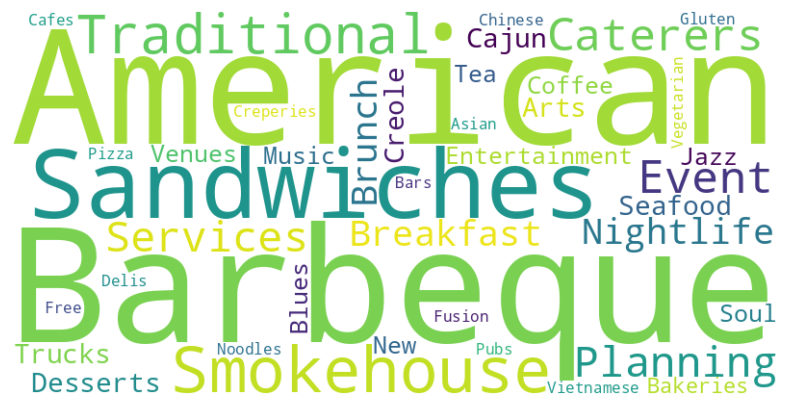

In [73]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(category for category in categories_in_top_10_businesses['categories'])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Restaurants', 'Food', 'Restaurant',"&","Markets","Shops"])


cleaned_words = [word for word in text.split() if word not in custom_stopwords]

word_counts = Counter(cleaned_words)

sorted_words = word_counts.most_common()

# for word, count in sorted_words:
#     print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
